# Лабраторная работа №3

Выполнила: Иванова Елизавета Дмитриевна, НПМмд-01-23

## Подключение

In [1]:
from tensorflow import keras
from keras.datasets  import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
# from google.colab import files
import numpy as np
import matplotlib.pyplot as plt

## Подготовка данных для обучения сети

**Загружаем набор данных с рукописными цифрами**

In [2]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

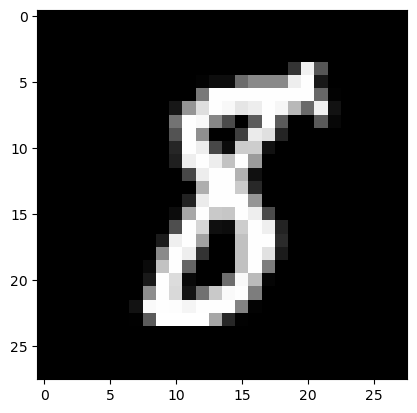

8
<class 'numpy.ndarray'>
(28, 28)
min val= 0, max val=255


In [3]:
n = 125
plt.imshow(x_train_org[n], cmap=plt.get_cmap('gray'))
plt.show()
print(y_train_org[n])
pic=x_train_org[n]
print(type(pic))
print(pic.shape)
print(f"min val= {pic.min()}, max val={pic.max()}")

In [4]:
#смотрим размерности входных и выходных данных
print(x_train_org.shape,y_train_org.shape)
print(x_test_org.shape,y_test_org.shape )

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


**Преобразование размерности данных в наборе**

In [5]:
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

**Нормализация данных**

In [6]:
x_train = x_train.astype('float32')
x_train /= 255

**Работа с правильными ответами**

In [7]:
print(y_train_org[n])

8


**Преобразуем метки в формат one hot encoding**

In [8]:
y_train = utils.to_categorical(y_train_org, 10)

**Правильный ответ в формате one hot encoding**

In [9]:
print(y_train[n])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [10]:
model = Sequential()

**Добавляем уровни сети**

In [11]:
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))

/Users/iveeliz/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Компилируем сеть**

In [12]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 800)            │       628,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 636,010 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

None


## Обучаем нейронную сеть

In [13]:
model.fit(x_train, y_train, batch_size=200, epochs=20,  verbose=True)

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8670 - loss: 0.4763
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9651 - loss: 0.1201
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9787 - loss: 0.0757
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9853 - loss: 0.0502
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9903 - loss: 0.0363
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9930 - loss: 0.0266
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9956 - loss: 0.0191
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9968 - loss: 0.0142
Epoch 9/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9973 - loss: 0.0118
Epoch 10/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9984 - loss: 0.0084
Epoch 11/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9993 - loss: 0.0056
Epoch 12/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

## Сохраняем обученную нейронную сеть

**Генерируем описание модели в формате json**

In [14]:
model_json = model.to_json()

In [15]:
print(model_json)

{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 784], "dtype": "float32", "sparse": false, "name": "input_layer"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "units": 800, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "kernel_constraint"

**Записываем архитектуру сети в файл**

In [16]:
json_file = open("mnist_model.json", "w")
json_file.write(model_json)
json_file.close()

**Записываем данные о весах сети в файл**

In [17]:
model.save_weights('mnist_model.weights.h5')

**Сохраняем файлы на локальный компьютер**

In [18]:
# files.download("mnist_model.weights.h5")

## Используем сеть для распознавания рукописных цифр

In [19]:
n_rec = 487

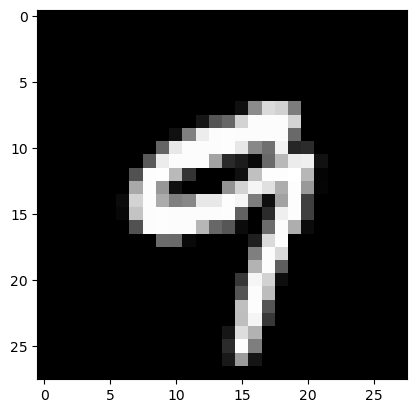

In [20]:
plt.imshow(x_test_org[n_rec], cmap=plt.get_cmap('gray'))
plt.show()

**Меняем размерность изображения и нормализуем его**

In [21]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)
print(x)
print(x.shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0  15 139 218 209 124
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  22  85 103 211 252 252 252 

In [22]:
x = x.astype('float32')
x /= 255
print(x)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

**Запускаем распознавание**

In [23]:
prediction = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


**Печатаем результаты распознавания**

In [24]:
print(prediction)

[[4.5325885e-10 9.4683213e-13 1.9108680e-11 1.1323715e-08 3.7293714e-07
  1.5931299e-07 4.6143764e-17 2.7280217e-07 7.5580076e-10 9.9999917e-01]]


**Преобразуем результаты из формата one hot encoding**

In [25]:
prediction = np.argmax(prediction)
print(prediction)

9


**Печатаем правильный ответ**

In [26]:
print(y_test_org[n_rec])

9


Маленькая демонстрация масок для массивов в numpy

In [27]:
a=np.array([1,2,3,4,5,6,7,8])
print(a)
b=a>5
print(b)
c=a[b]
print(c)

[1 2 3 4 5 6 7 8]
[False False False False False  True  True  True]
[6 7 8]


## Задание

In [28]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()
x_train = x_train_org.reshape(60000, 784).astype('float32') / 255
x_test = x_test_org.reshape(10000, 784).astype('float32') / 255

In [29]:
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [30]:
model = Sequential()
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
model.fit(x_train, y_train, batch_size=200, epochs=20, verbose=True)

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8621 - loss: 0.4877
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9661 - loss: 0.1215
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9802 - loss: 0.0705
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9861 - loss: 0.0486
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9902 - loss: 0.0355
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9942 - loss: 0.0245
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9953 - loss: 0.0199
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9964 - loss: 0.0148
Epoch 9/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9977 - loss: 0.0110
Epoch 10/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9992 - loss: 0.0067
Epoch 11/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9993 - loss: 0.0059
Epoch 12/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [32]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 386us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step


In [33]:
y_pred_train_classes = np.argmax(y_pred_train, axis=1)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

In [34]:
# wrong_train = y_pred_train_classes[y_pred_train_classes != y_train_org]
# wrong_test = y_pred_test_classes[y_pred_test_classes != y_test_org]
wrong_train = np.where(y_pred_train_classes != y_train_org)[0]
wrong_test = np.where(y_pred_test_classes != y_test_org)[0]

In [35]:
print(f"Неправильно распознанные примеры на обучающей выборке: {len(wrong_train)}")
print(f"Неправильно распознанные примеры на тестовой выборке: {len(wrong_test)}")

Неправильно распознанные примеры на обучающей выборке: 0
Неправильно распознанные примеры на тестовой выборке: 163


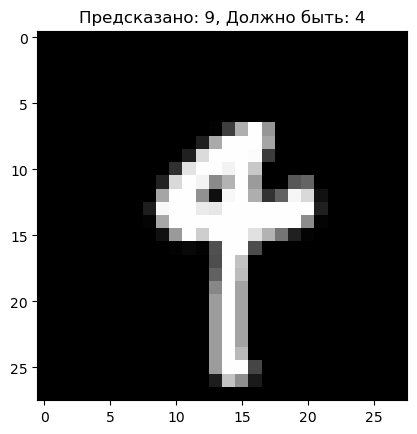

In [36]:
wrong_index = np.random.choice(wrong_test)
plt.imshow(x_test_org[wrong_index], cmap=plt.get_cmap('gray'))
plt.title(f"Предсказано: {y_pred_test_classes[wrong_index]}, Должно быть: {y_test_org[wrong_index]}")
plt.show()